In [1]:
import pandas as pd
import random

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import MinMaxScaler 

import matplotlib.pyplot as plt

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import seaborn as sns






from sklearn.decomposition import PCA


import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
from sklearn.metrics import silhouette_score

Read in a randome sample of 10000 rows from the csv file.

In [2]:
# Get the total number of rows in the CSV file
total_rows = sum(1 for line in open("cleaned_train.csv")) - 1 # subtract 1 to exclude header row

# Set the random seed to a fixed value
random.seed(42)

# Determine the row indices to skip
skip_rows = sorted(random.sample(range(1, total_rows + 1), total_rows - 10000))

# Read the CSV file, skipping the specified rows
df = pd.read_csv("cleaned_train.csv", skiprows=skip_rows)

In [3]:
df.head(4)

Unnamed: 0  MONTH  DAY_OF_WEEK  DEP_TIME_BLK  DISTANCE_GROUP  \
0        1861      5            3             2               5   
1        1940      8            7            14               4   
2        2444      1            6             5               7   
3        2623     11            4             4              10   

   SEGMENT_NUMBER  CONCURRENT_FLIGHTS  NUMBER_OF_SEATS  CARRIER_NAME  \
0               1                  17              175            14   
1               6                   7              157             0   
2               1                  13              175            14   
3               2                  46              181             0   

   AIRPORT_FLIGHTS_MONTH  ...  DEPARTING_AIRPORT  LATITUDE  LONGITUDE  \
0                   5040  ...                254    45.589   -122.595   
1                   3463  ...                231    33.676   -117.867   
2                   7465  ...                105    39.176    -76.671   
3                  17358  ...                184    33.942   -118.408   

   PREVIOUS_AIRPORT  PRCP  SNOW  SNWD  TMAX  AWND  DEP_DEL15  
0               216  0.00   0.0   0.0  70.0  5.82          1  
1               296  0.00   0.0   0.0  82.0  6.04          0  
2               216  0.76   0.0   1.2  38.0  7.38          0  
3               195  0.01   0.0   0.0  67.0  5.37          0  

[4 rows x 27 columns]

In [4]:
df.columns

Index(['Unnamed: 0', 'MONTH', 'DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP',
       'SEGMENT_NUMBER', 'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS',
       'CARRIER_NAME', 'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'DEP_DEL15'],
      dtype='object')

Have to get rid of the first two columns as they're unneccassary

In [5]:
df = df.drop(columns=['Unnamed: 0', 'MONTH'])
df.columns

Index(['DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
       'AIRPORT_FLIGHTS_MONTH', 'AIRLINE_FLIGHTS_MONTH',
       'AIRLINE_AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT',
       'AVG_MONTHLY_PASS_AIRLINE', 'FLT_ATTENDANTS_PER_PASS',
       'GROUND_SERV_PER_PASS', 'PLANE_AGE', 'DEPARTING_AIRPORT', 'LATITUDE',
       'LONGITUDE', 'PREVIOUS_AIRPORT', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND',
       'DEP_DEL15'],
      dtype='object')

In [6]:
features = df.drop(['DEP_DEL15'], axis=1)
label = df[['DEP_DEL15']]

Not smart to use all the features to train the model using k means clustering so therefore I will be using the correlation matrix to select features that are notnecassary.

The code below will identify highly corelated column pairs and drop one of them. This means that any two features with an absolute correlation coefficient greater than 0.8 in this case will be considered highly correlated, and one of them will be dropped from the dataframe.

In [ ]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=10)
rfe.fit(features, label)
ranking = rfe.ranking_.reshape(df.images[0].shape)

# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()

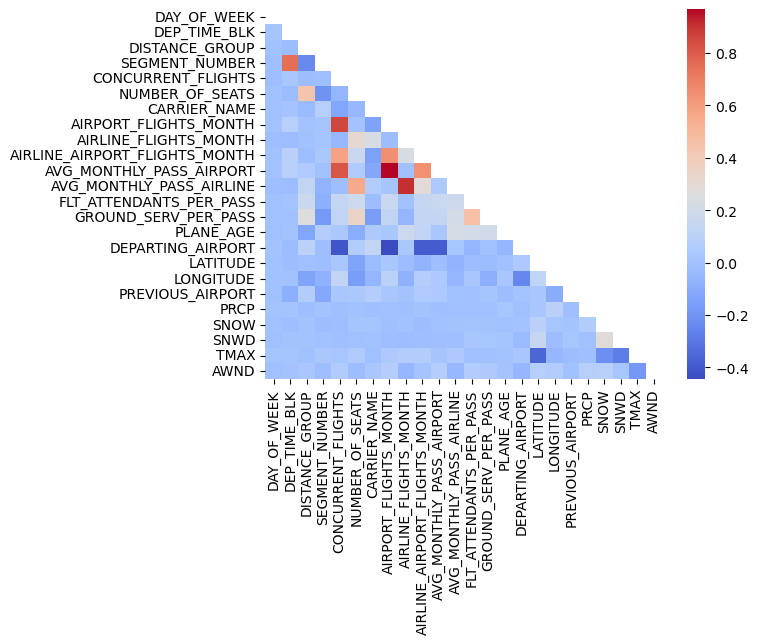

In [7]:
# Compute correlation matrix
corr = features.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot correlation matrix
sns.heatmap(corr, mask=mask, cmap='coolwarm')
plt.show()

# Remove highly correlated features
threshold = 0.8
to_drop = []
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i,j]) > threshold:
            colname = corr.columns[j]
            to_drop.append(colname)
featuresN = features.drop(to_drop, axis=1)

The boxes that are coloured on the deeper sideof the red indicate the two featuresrelating to that are highly correlated.Below are the columns that were dropped. (Three columns in total)

In [8]:
print(to_drop)

['AIRPORT_FLIGHTS_MONTH', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRPORT', 'AVG_MONTHLY_PASS_AIRLINE']


In [9]:
featuresN.columns

Index(['DAY_OF_WEEK', 'DEP_TIME_BLK', 'DISTANCE_GROUP', 'SEGMENT_NUMBER',
       'CONCURRENT_FLIGHTS', 'NUMBER_OF_SEATS', 'CARRIER_NAME',
       'AIRLINE_FLIGHTS_MONTH', 'AIRLINE_AIRPORT_FLIGHTS_MONTH',
       'FLT_ATTENDANTS_PER_PASS', 'GROUND_SERV_PER_PASS', 'PLANE_AGE',
       'DEPARTING_AIRPORT', 'LATITUDE', 'LONGITUDE', 'PREVIOUS_AIRPORT',
       'PRCP', 'SNOW', 'SNWD', 'TMAX', 'AWND'],
      dtype='object')

https://machinelearningmastery.com/rfe-feature-selection-in-python/ <- For recursive feature elimination. I used the estimator lr. 

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
rfe = RFE(estimator, n_features_to_select=10)
rfe.fit(featuresN, label.values.ravel())

# summarize the selection of the attributes
selected_features = pd.DataFrame({'Feature':list(featuresN.columns),
                                   'Ranking':rfe.ranking_})
selected_features.sort_values('Ranking', inplace=True)
print(selected_features)

In [10]:
# initialize linear regression model
lr = LinearRegression()

# create RFE object with linear regression estimator, and set the number of features to select to 10
rfe = RFE(lr, n_features_to_select=10)

# fit the RFE object to the data
rfe.fit(featuresN, label)

# summarize the selection of the attributes
selected_features = pd.DataFrame({'Feature':list(featuresN.columns),
                                   'Ranking':rfe.ranking_})
selected_features.sort_values('Ranking', inplace=True)
print(selected_features)

                          Feature  Ranking
0                     DAY_OF_WEEK        1
18                           SNWD        1
17                           SNOW        1
16                           PRCP        1
11                      PLANE_AGE        1
9         FLT_ATTENDANTS_PER_PASS        1
10           GROUND_SERV_PER_PASS        1
2                  DISTANCE_GROUP        1
1                    DEP_TIME_BLK        1
20                           AWND        1
13                       LATITUDE        2
14                      LONGITUDE        3
19                           TMAX        4
3                  SEGMENT_NUMBER        5
6                    CARRIER_NAME        6
5                 NUMBER_OF_SEATS        7
12              DEPARTING_AIRPORT        8
4              CONCURRENT_FLIGHTS        9
15               PREVIOUS_AIRPORT       10
8   AIRLINE_AIRPORT_FLIGHTS_MONTH       11
7           AIRLINE_FLIGHTS_MONTH       12


Based on the feature rankings generated by the Recursive Feature Elimination (RFE) technique, we can select the most important features for our analysis. In this case, we can choose the features that have rankings between 1 and 3 (inclusive), as these are considered to be the most relevant features for our machine learning model.

In [11]:
columns_to_extract = ['DAY_OF_WEEK', 'SNWD', 'SNOW', 'PRCP', 'PLANE_AGE','FLT_ATTENDANTS_PER_PASS','GROUND_SERV_PER_PASS','DISTANCE_GROUP','DISTANCE_GROUP','DEP_TIME_BLK','AWND','LATITUDE','LONGITUDE']
X = features[columns_to_extract]

Finding the optimal number of clusters using the elbow method.Need to find the elbow point which is the point where the rate of increase in WCSS slows down significantly. (The code for this : https://www.simplilearn.com/tutorials/machine-learning-tutorial/k-means-clustering-algorithm)

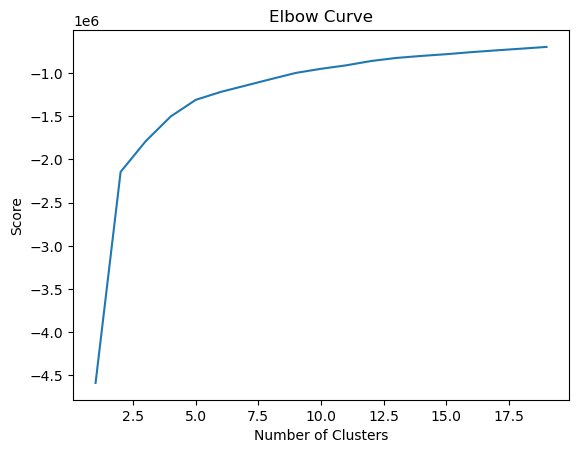

In [13]:
# Finding the optimum number of clusters for k-means clustering
Nc = range(1, 20)
kmeans = [KMeans(random_state=0, n_clusters=i) for i in Nc]
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [14]:
X.head(3)

DAY_OF_WEEK  SNWD  SNOW  PRCP  PLANE_AGE  FLT_ATTENDANTS_PER_PASS  \
0            3   0.0   0.0  0.00          3                 0.000062   
1            7   0.0   0.0  0.00         10                 0.000032   
2            6   1.2   0.0  0.76          1                 0.000062   

   GROUND_SERV_PER_PASS  DISTANCE_GROUP  DISTANCE_GROUP  DEP_TIME_BLK  AWND  \
0              0.000099               5               5             2  5.82   
1              0.000175               4               4            14  6.04   
2              0.000099               7               7             5  7.38   

   LATITUDE  LONGITUDE  
0    45.589   -122.595  
1    33.676   -117.867  
2    39.176    -76.671

In [15]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

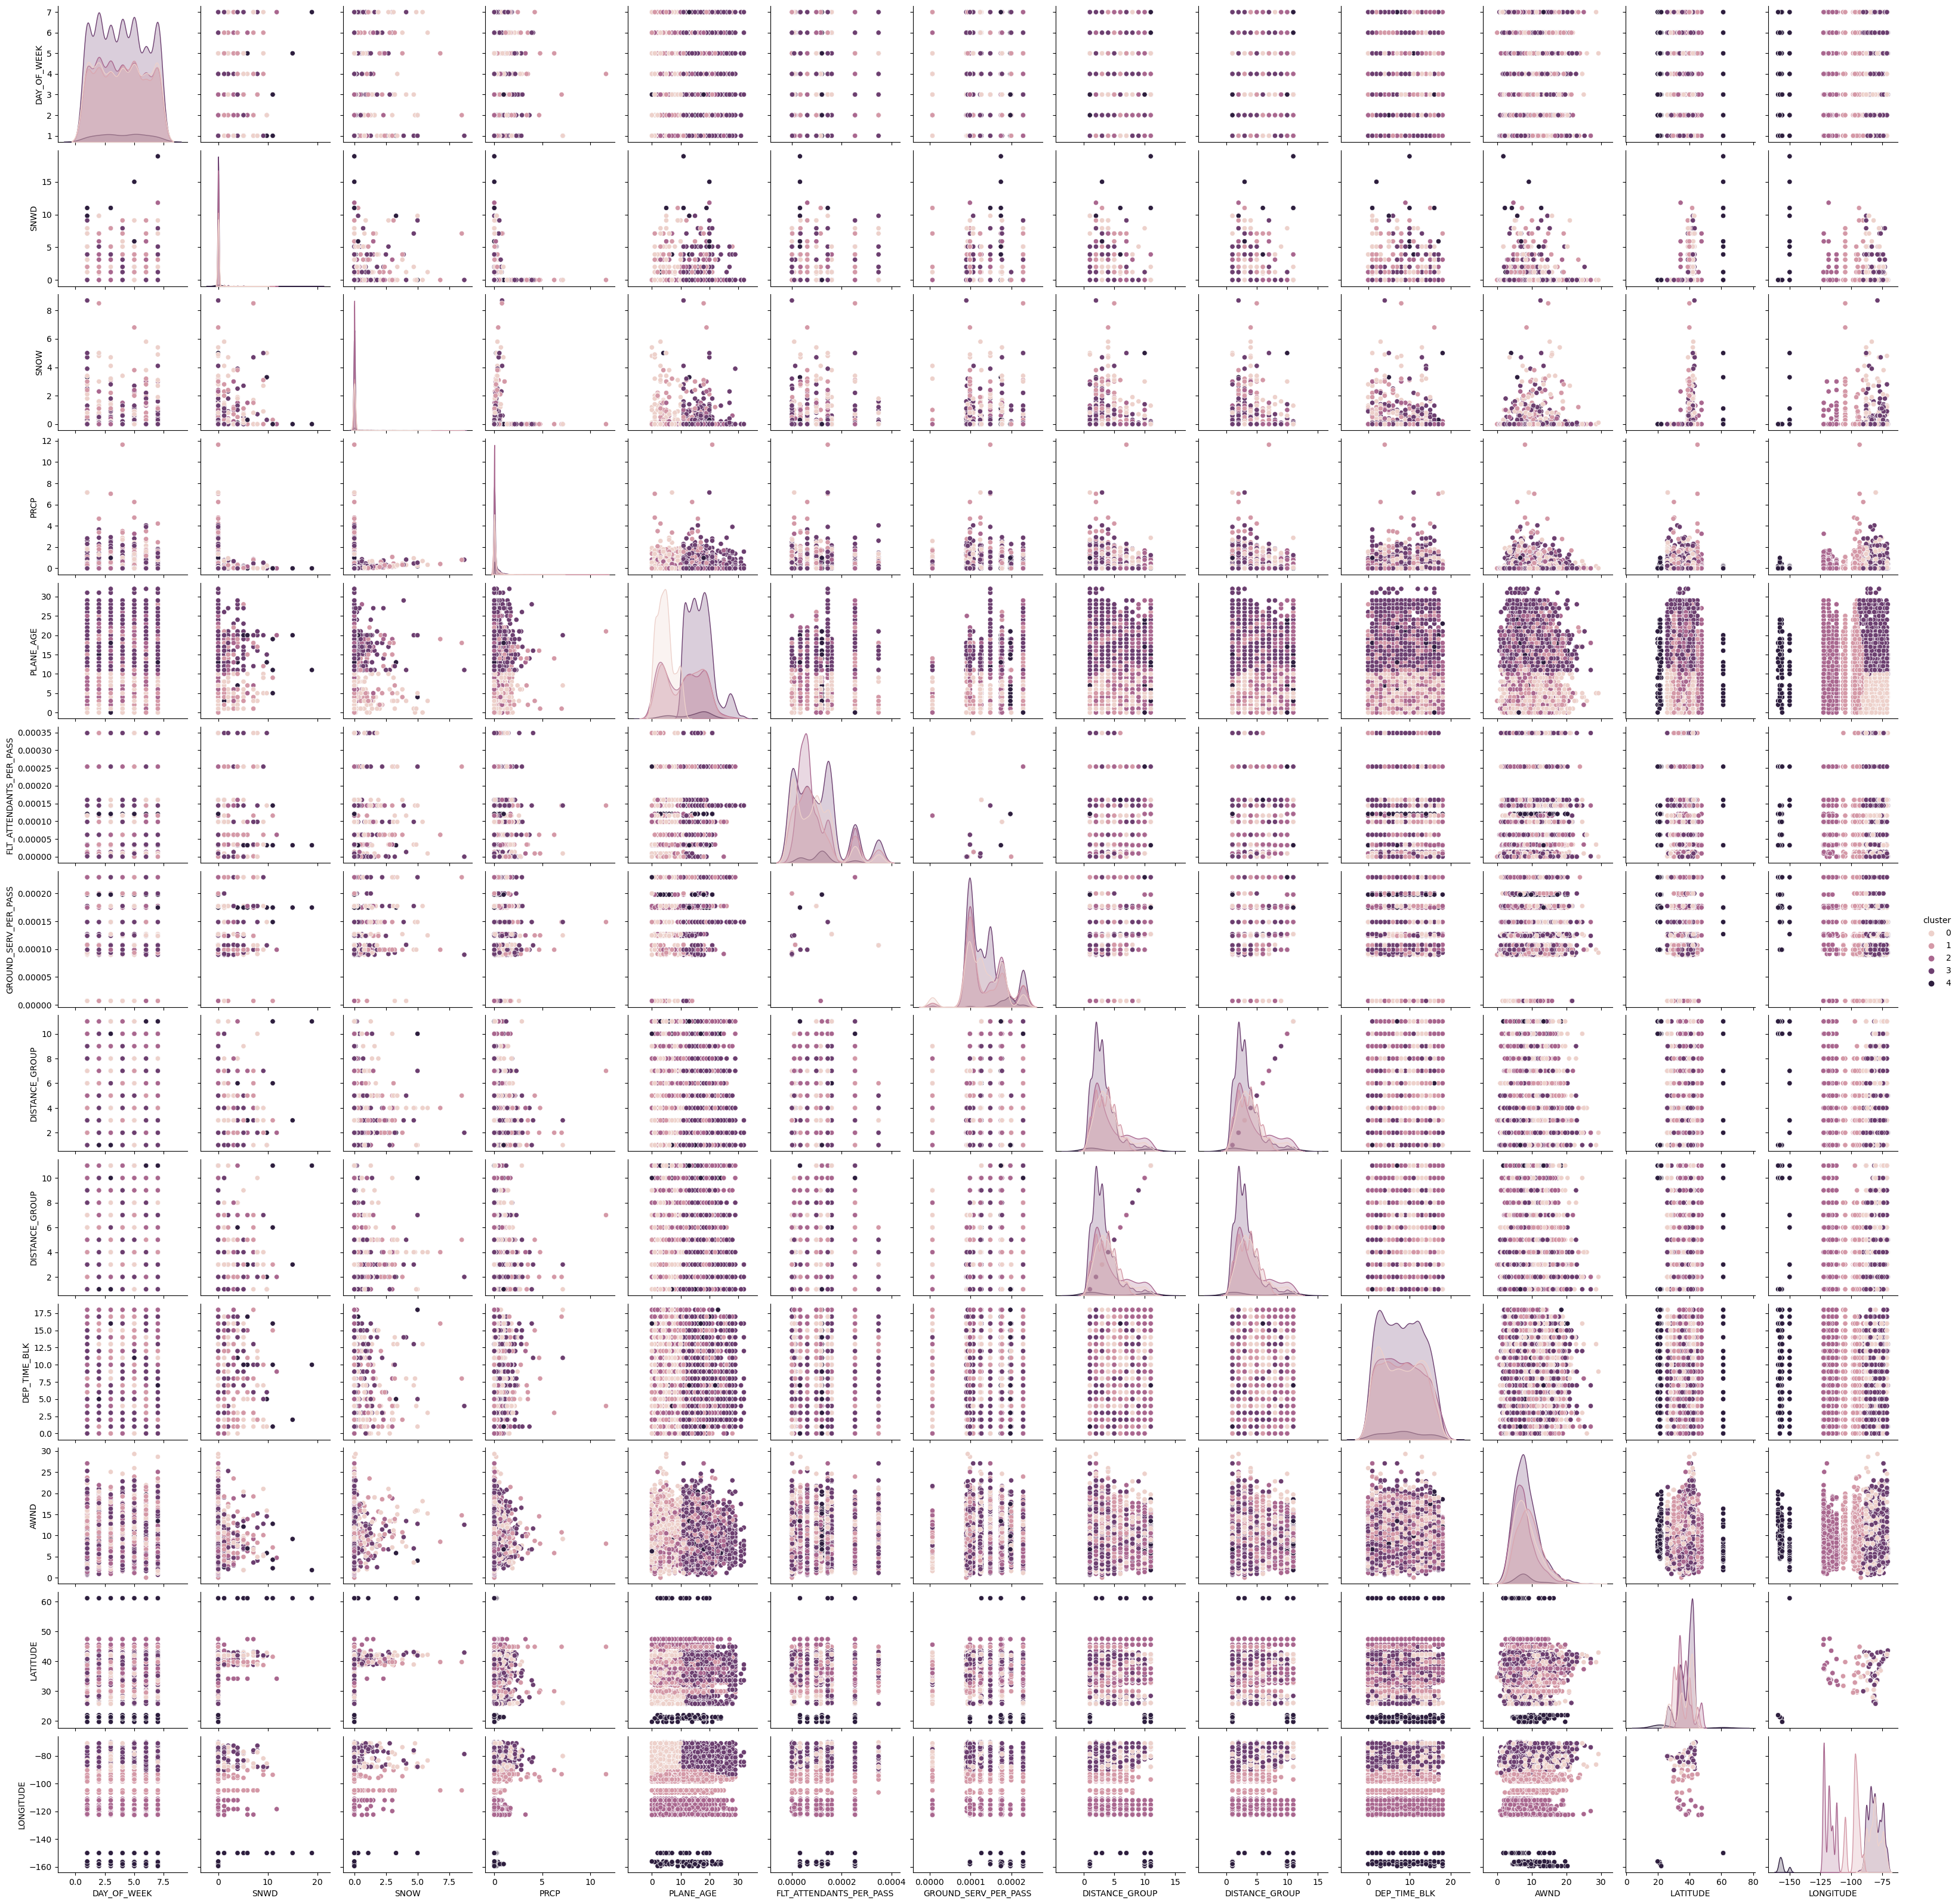

In [16]:
# get cluster labels and add them to the original dataframe
df['cluster'] = kmeans.labels_

# visualize the clusters using a pair plot
sns.pairplot(data=df, vars=columns_to_extract, hue='cluster')

<AxesSubplot:xlabel='PLANE_AGE', ylabel='LONGITUDE'>

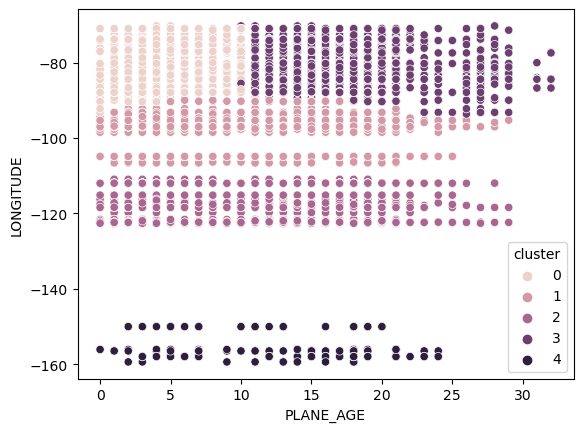

In [17]:
sns.scatterplot(data=df, x='PLANE_AGE', y='LONGITUDE', hue='cluster')

<AxesSubplot:xlabel='SNOW', ylabel='SNWD'>

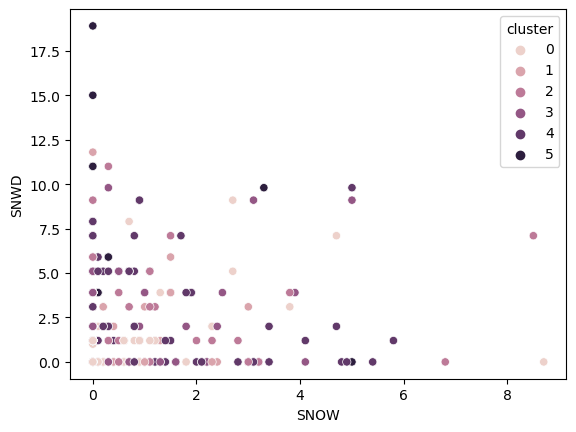

In [82]:
sns.scatterplot(data=df, x='SNOW', y='SNWD', hue='cluster')